<a href="https://colab.research.google.com/github/ThomasTranGithub/Signal.Detection.Practice/blob/main/BayesianInferenceExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Pull in Live Data Here

In [ ]:
#Bayesian Ingerence in Trading Signals based on Positive Earnings

#Step 1: Define the Hypothesis and Prior Probability

#Hypothesis: The stock price will increase tomrrow based on positive earnings.

#Prior Probability: Based on historical data and market analysis you believe
#there is a 70% chance that positive earnings will lead to an increase in the
#stock price.

#P(Increase in Stock Price | Positive Earnings) = .70

#Step 2: Gather Data and Calculate Likelihood

#You analyze historical earnings reports and find that in the past, when the
#company reported positive earnings, the stock price increase 80% of the time.

#Step 3: Apply Bayes' Theorem
#Plug the values into Bayes' Theorem the calculate the posterior probability

# [P(Increase in Stock Price | Positive Earnings ) * P(Positive Earnings)]/
#.             P(Increaes in stock price)




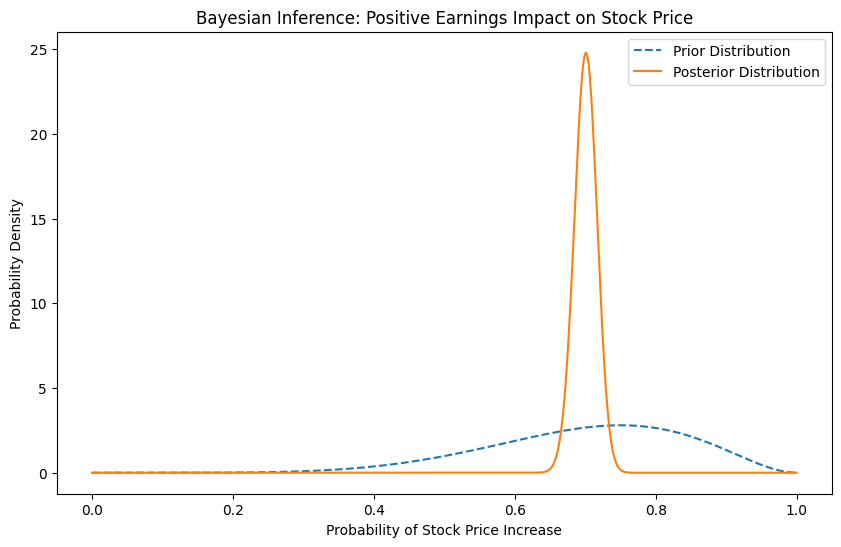

Prior Probability: 0.7
Likelihood: 0.8095238095238095
Posterior Probability: 0.7003699136868065


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Fake data generation
np.random.seed(42)

# Prior probability
prior_probability = 0.7

# Number of simulations
num_simulations = 1000

# Simulate positive earnings impact on stock price
positive_earnings_samples = np.random.choice([1, 0], size=num_simulations, p=[0.8, 0.2])

# Simulate stock price increase based on prior probability
stock_price_increase_samples = np.random.choice([1, 0], size=num_simulations, p=[prior_probability, 1 - prior_probability])

# Calculate likelihood
likelihood = np.mean(positive_earnings_samples[stock_price_increase_samples == 1])

# Apply Bayesian inference using Beta distribution
alpha_prior = 7  # equivalent to 70% success rate
beta_prior = 3
alpha_posterior = alpha_prior + np.sum(positive_earnings_samples[stock_price_increase_samples == 1])
beta_posterior = beta_prior + np.sum(positive_earnings_samples[stock_price_increase_samples == 0])

# Generate posterior distribution
posterior_distribution = beta(alpha_posterior, beta_posterior)

# Plot results
x = np.linspace(0, 1, 1000)
plt.figure(figsize=(10, 6))

# Plot prior distribution
plt.plot(x, beta(alpha_prior, beta_prior).pdf(x), label='Prior Distribution', linestyle='--')

# Plot posterior distribution
plt.plot(x, posterior_distribution.pdf(x), label='Posterior Distribution')

plt.title('Bayesian Inference: Positive Earnings Impact on Stock Price')
plt.xlabel('Probability of Stock Price Increase')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Display results
print(f"Prior Probability: {prior_probability}")
print(f"Likelihood: {likelihood}")
print(f"Posterior Probability: {alpha_posterior / (alpha_posterior + beta_posterior)}")


Sell Signal: Likelihood does not exceed 0.80


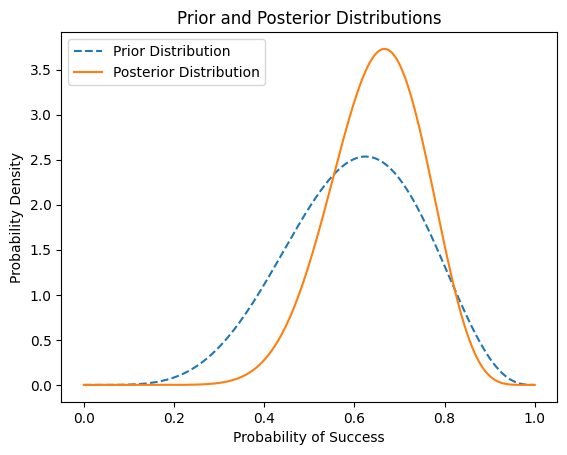

In [5]:
import numpy as np
from scipy.stats import beta

# Simulated data: 10 trades with 7 profitable
num_trades = 10
num_profitable_trades = 7

# Prior belief about the success rate
prior_probability = 0.6

# Likelihood function (binomial likelihood)
likelihood = lambda p: np.math.comb(num_trades, num_profitable_trades) * (p ** num_profitable_trades) * ((1 - p) ** (num_trades - num_profitable_trades))

# Prior distribution (Beta distribution)
alpha_prior = 6  # corresponding to a prior probability of 0.6
beta_prior = 4
prior_distribution = beta(alpha_prior, beta_prior)

# Posterior distribution (Beta distribution after updating with data)
alpha_posterior = alpha_prior + num_profitable_trades
beta_posterior = beta_prior + (num_trades - num_profitable_trades)
posterior_distribution = beta(alpha_posterior, beta_posterior)

# Calculate the posterior probability
posterior_probability = alpha_posterior / (alpha_posterior + beta_posterior)

# Set the threshold for triggering a buy signal
buy_threshold = 0.80

# Make a trading decision
if posterior_probability > buy_threshold:
    print("Buy Signal: Likelihood exceeds 0.80")
else:
    print("Sell Signal: Likelihood does not exceed 0.80")

# Plot the prior and posterior distributions (optional)
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 1000)
plt.plot(x, prior_distribution.pdf(x), label='Prior Distribution', linestyle='--')
plt.plot(x, posterior_distribution.pdf(x), label='Posterior Distribution')
plt.title('Prior and Posterior Distributions')
plt.xlabel('Probability of Success')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


In [ ]:
#Send Signal to Brokerage Here